# ***Credit Card Fraud Detection***

The dataset contains transactions made by credit cards in September 2013 by European cardholders. Source (https://www.kaggle.com/mlg-ulb/creditcardfraud ). This dataset presents transactions that occured in two days, the possive class (frauds) account for only 0.172% of all transactions.
It contains only numerical input variables which are the result of PCA transformation. The only features which have not been transformed  with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed betwwen each transaction and the first transaction in the dataset and the feature 'Amount' is the transaction amount.  The feature 'Class' is target variable and it takes value 1 in case of fraud, 0 otherwise.
The dataset has been collected and analysed during a reasearch collaboration of Worldline and the Machine Learning Group of ULB, on big data mining and fraud ditection. 

In [5]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#set a fixed number for random state
rs=42

In [6]:

df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head(10)

(15936, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


'Time' column won't be of much imporance while identifing a fraud, so we will remove it.

In [7]:
df = df.drop(['Time'],axis=1)

In [8]:
# checking for missing values
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [9]:
df = df.dropna(axis=0)

In [10]:
df['Class'].value_counts()

0.0    15862
1.0       73
Name: Class, dtype: int64

The dataset is indeed highly imbalanced.

In [11]:
legit = df[df.Class==0]
fraud =df[df.Class==1]
print(legit.shape)
print(fraud.shape)

(15862, 30)
(73, 30)


In [12]:
legit.Amount.describe()

count    15862.000000
mean        66.280151
std        188.898885
min          0.000000
25%          5.522500
50%         15.950000
75%         53.890000
max       7712.430000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count      73.000000
mean       90.307123
std       271.634360
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [14]:
# compare the values for both transactions
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,-0.219072,0.25000,0.862854,0.272641,-0.105868,0.124522,-0.112681,-0.016178,0.879120,-0.254407,0.777591,-1.348599,0.891758,0.775426,-0.135132,-0.009028,0.400976,-0.008838,-0.085272,0.028173,-0.064056,-0.161585,-0.035040,0.013076,0.117023,0.037111,0.011206,0.005907,66.280151
1.0,-7.929807,6.19312,-11.997831,6.555050,-5.474984,-2.480356,-8.354317,3.668478,-3.086988,-7.573464,6.464977,-9.815642,0.509696,-9.345441,-0.205216,-5.349574,-8.377201,-2.901321,0.404317,0.671905,0.441100,-0.295856,-0.358994,-0.328925,0.216076,0.209323,0.927187,0.061380,90.307123


We notice that generally the fraud instanses have higher  absolut mean values for each feature.

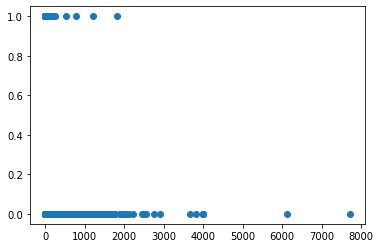

In [15]:
plt.scatter(df['Amount'],df['Class']);

The Amount for all fraud instances is less than 5,000.

We will try to build a sample dataset containg similar distributions of normal and fraudulent transactions.

In [16]:
# undersampling using only legit transactions with amount under 5,000.
legit_sample = legit.where(legit['Amount']<5000).sample(n=len(fraud['Class']))
legit_sample.shape

(73, 30)

In [17]:
new_data = pd.concat([legit_sample,fraud],axis=0)
new_data.shape

(146, 30)

In [18]:
new_data['Class'].value_counts()

1.0    73
0.0    73
Name: Class, dtype: int64

In [19]:
# splitting the data into features and target
X = new_data.drop(columns='Class',axis=1)
y = new_data['Class']

In [20]:
# split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=rs)


***Logistic Regression Model***

In [21]:
lr_model = LogisticRegression(C= 1.2,max_iter=120, random_state= rs, solver='liblinear', tol=0.0005)
lr_model.fit(X_train,y_train)
predictions = lr_model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91        17
         1.0       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.90        30
weighted avg       0.90      0.90      0.90        30



***Random Forest Model***

In [22]:
rf_model = RandomForestClassifier(max_depth=10,n_jobs=20,n_estimators=500,random_state=rs)
rf_model.fit(X_train,y_train)
prediction = rf_model.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        17
         1.0       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



From the models above we shall choose the Random Forest model because scores slightly better in predicting fraud instances (precision in Class 1 is higher), even though Logistic Regression model has better accuracy.